<a href="https://colab.research.google.com/github/Belal-AI/Rev-Projects/blob/main/practical_ML_and_DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.svm import LinearSVC

In [2]:
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [4]:
x=iris.data
columns=iris.feature_names
data=pd.DataFrame(data=x,columns=columns)
data['target']=iris.target

In [5]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
corr=data.corr()

<Axes: >

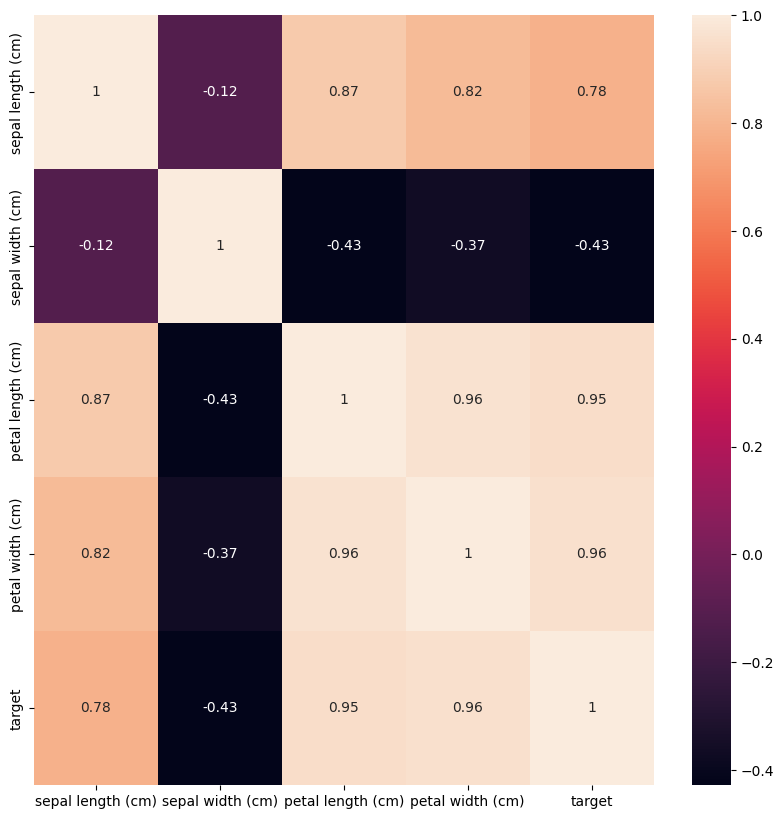

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data=corr,annot=True)

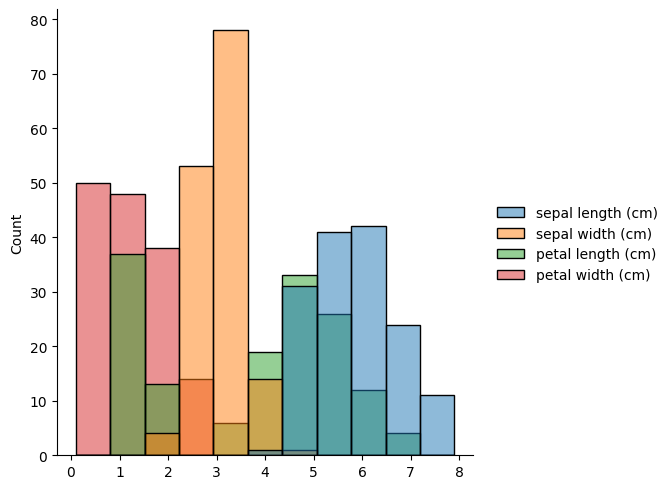

In [9]:
sns.displot(data=data.iloc[:,:-1])

In [10]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

<ipython-input-11-6e4d530613e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],label=i)
<ipython-input-11-6e4d530613e4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i],label=i)
<ipython-input-11-6e4d530613e4>:5: UserWarning: 

`distplot` is a deprecated function and will be re

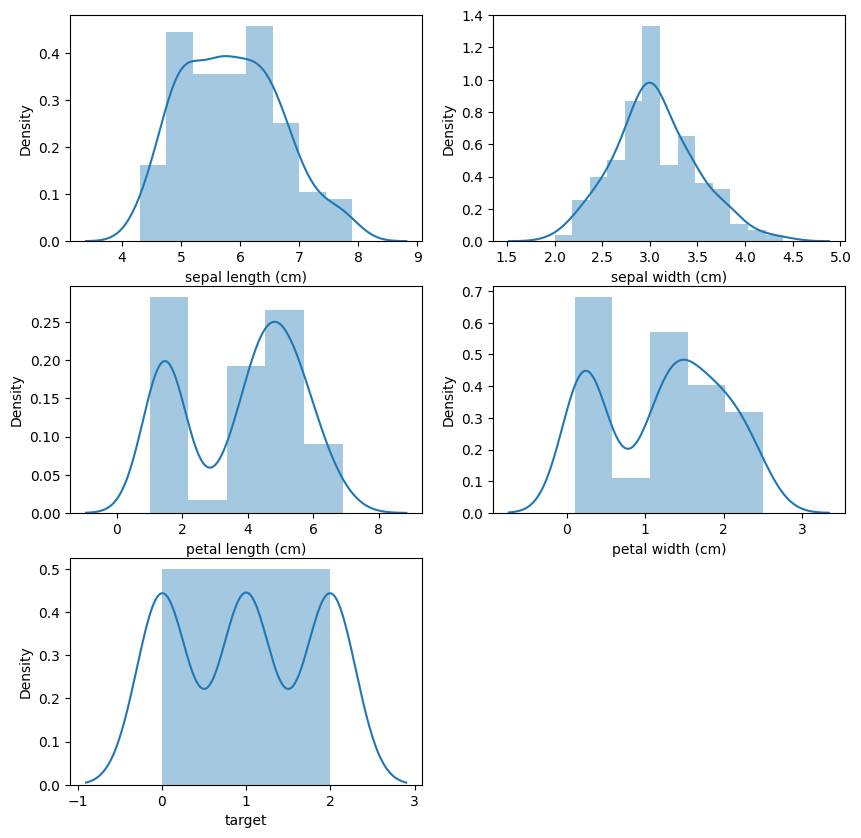

In [11]:
plt.figure(figsize=(10,10))
j=0
for i in data :
  plt.subplot(3,2,j+1)
  sns.distplot(data[i],label=i)
  j+=1

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
trainx,testx,trainy,testy=train_test_split(data.iloc[:,:-1],data.iloc[:,-1])

In [14]:
trainy.shape

(112,)

In [15]:
from sklearn.multiclass import OneVsRestClassifier

In [16]:
svc=LinearSVC(C=2,loss="hinge")

In [17]:
model=OneVsRestClassifier(svc)

In [18]:
model.fit(trainx,trainy)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OneVsRestClassifier(estimator=LinearSVC(C=2, loss='hinge'))

In [19]:
model.predict(testx)

array([1, 0, 0, 1, 1, 0, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 2,
       1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1])

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(testy,model.predict(testx))

0.9736842105263158

In [23]:
data=pd.read_csv("airlinedelaycauses_DelayedFlights.csv")
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50281,163940,2008,1,23,3,2140.0,2028,2300.0,2209,OH,...,6.0,9.0,0.0,N,0.0,0.0,51.0,0.0,0.0,0.0
50282,163949,2008,1,23,3,1530.0,1510,1728.0,1726,OH,...,9.0,15.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
50283,163962,2008,1,23,3,925.0,915,942.0,925,OH,...,9.0,19.0,0.0,N,0.0,10.0,0.0,7.0,0.0,0.0
50284,163963,2008,1,23,3,900.0,705,1012.0,821,OH,...,2.0,22.0,0.0,N,0.0,111.0,0.0,0.0,0.0,0.0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50286 entries, 0 to 50285
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         50286 non-null  int64  
 1   Year               50286 non-null  int64  
 2   Month              50286 non-null  int64  
 3   DayofMonth         50286 non-null  int64  
 4   DayOfWeek          50286 non-null  int64  
 5   DepTime            50286 non-null  float64
 6   CRSDepTime         50286 non-null  int64  
 7   ArrTime            50135 non-null  float64
 8   CRSArrTime         50286 non-null  int64  
 9   UniqueCarrier      50286 non-null  object 
 10  FlightNum          50286 non-null  int64  
 11  TailNum            50286 non-null  object 
 12  ActualElapsedTime  50135 non-null  float64
 13  CRSElapsedTime     50286 non-null  float64
 14  AirTime            50135 non-null  float64
 15  ArrDelay           50135 non-null  float64
 16  DepDelay           502

In [25]:
data.isna().sum()

Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                151
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      151
CRSElapsedTime           0
AirTime                151
ArrDelay               151
DepDelay                 1
Origin                   1
Dest                     1
Distance                 1
TaxiIn                 152
TaxiOut                  1
Cancelled                1
CancellationCode         1
Diverted                 1
CarrierDelay         19280
WeatherDelay         19280
NASDelay             19280
SecurityDelay        19280
LateAircraftDelay    19280
dtype: int64

In [26]:
data.fillna(data.mean(),inplace=True)

<ipython-input-26-d85acd3950fb>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(),inplace=True)


In [27]:
data.isna().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               1
Dest                 1
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     1
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

<Figure size 2000x2000 with 0 Axes>

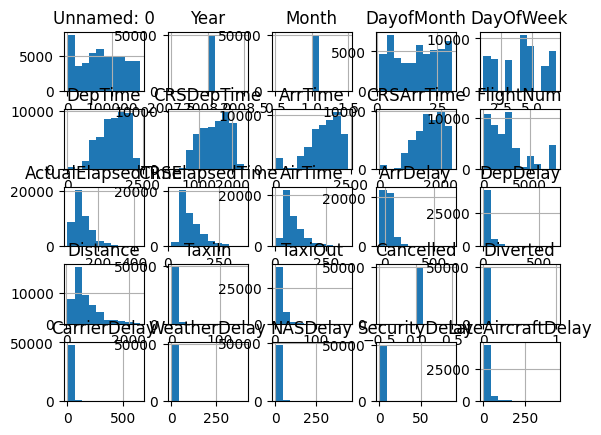

In [28]:
plt.figure(figsize=(20,20))
data.hist()
plt.show()

<Axes: >

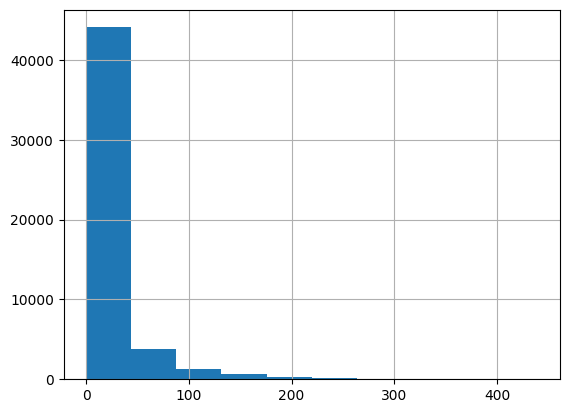

In [29]:
data["LateAircraftDelay"].hist()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
data=pd.get_dummies(data=data)
data

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Dest_TPA,Dest_TRI,Dest_TUL,Dest_TUS,Dest_TVC,Dest_TYS,Dest_VPS,Dest_XNA,Dest_YUM,CancellationCode_N
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,335,...,1,0,0,0,0,0,0,0,0,1
1,1,2008,1,3,4,754.0,735,1002.0,1000,3231,...,1,0,0,0,0,0,0,0,0,1
2,2,2008,1,3,4,628.0,620,804.0,750,448,...,0,0,0,0,0,0,0,0,0,1
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,3920,...,0,0,0,0,0,0,0,0,0,1
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,378,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50281,163940,2008,1,23,3,2140.0,2028,2300.0,2209,5231,...,0,0,0,0,0,0,0,0,0,1
50282,163949,2008,1,23,3,1530.0,1510,1728.0,1726,5238,...,0,0,0,0,0,0,0,0,0,1
50283,163962,2008,1,23,3,925.0,915,942.0,925,5249,...,0,0,0,0,0,0,0,0,0,1
50284,163963,2008,1,23,3,900.0,705,1012.0,821,5249,...,0,0,0,0,0,0,0,0,0,1


In [32]:
data=scaler.fit_transform(X=data.iloc[:,:-1],y=data.iloc[:,-1])

In [33]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y =train_test_split(data[:,:-1],data[:,-1])

#we need to create regression model with l1 or l2 regularization 
#with kernal polynomial and pipline  with SVR or Linear model as lasoo or rigde or elasticnet dosnet matter

In [47]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler ,PolynomialFeatures
from sklearn.metrics import  mean_squared_error

In [45]:
svr=make_pipeline(StandardScaler(),SVR(C=1,degree=5))

In [46]:
svr.fit(train_X,train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=1, degree=5))])

In [48]:
mean_squared_error(test_y,svr.predict(test_X))

0.8671042339765487

#Improve the model by regressino with regularization and svr again with different C and Degree and epsilon